In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns = {0:'Zero Values',
                   1:'Missing Values',
                   2:'% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values( '% of Total Values', ascending=False).round(1)
    
    return mz_table

In [3]:
pd.set_option("display.max_columns", 100)

In [4]:
features_df = pd.read_csv("training_set_features.csv")
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 36)


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
features_df = features_df.set_index('respondent_id')

In [6]:
missing_zero_values_table(features_df)

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
employment_occupation,0,13470,50.4,13470,50.4,object
employment_industry,0,13330,49.9,13330,49.9,object
health_insurance,1736,12274,46.0,14010,52.5,float64
income_poverty,0,4423,16.6,4423,16.6,object
doctor_recc_xyz,19139,2160,8.1,21299,79.8,float64
doctor_recc_seasonal,16453,2160,8.1,18613,69.7,float64
rent_or_own,0,2042,7.6,2042,7.6,object
employment_status,0,1463,5.5,1463,5.5,object
marital_status,0,1408,5.3,1408,5.3,object
education,0,1407,5.3,1407,5.3,object


In [7]:
labels_df = pd.read_csv('training_set_labels.csv')
print('labels_df.shape',labels_df.shape)
labels_df.head()

labels_df.shape (26707, 3)


,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
labels_df = labels_df.set_index('respondent_id')

In [9]:
features_df['child_under_6_months'].isna().sum()

820

In [10]:
features_df['health_insurance'].isna().sum()

12274

In [11]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [12]:
entire_df = pd.merge(features_df, labels_df, on="respondent_id", how='inner')
entire_df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [13]:
entire_df.shape

(26707, 37)

In [14]:
def fillpoverty(row):
    if row['age_group'] == "65+ Years" and row['employment_status'] == "Not in Labor Force":
        return "Retired"
    elif row['employment_status'] == "Unemployed" or row['employment_status'] == "Not in Labor Force":
        return "Unemployed"
    else:
        return "N/A"

In [15]:
entire_df["income_poverty"] = entire_df.apply(lambda x: fillpoverty(x) if pd.isnull(x['income_poverty']) else x['income_poverty'], axis = 1)

In [16]:
entire_df = entire_df[entire_df['employment_status'].notna()]

In [17]:
entire_df.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

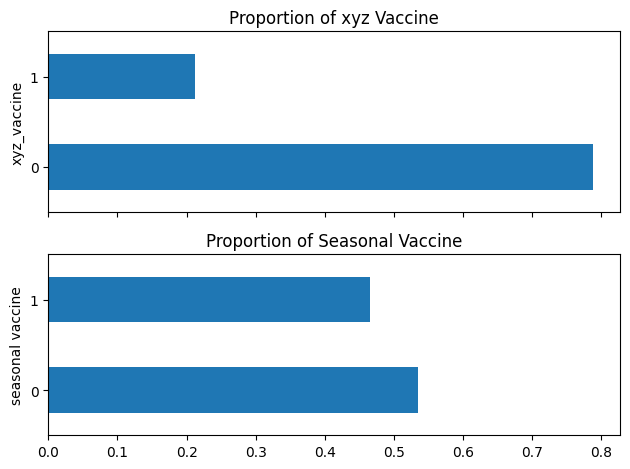

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

labels_df['xyz_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of xyz Vaccine", ax=ax[0])
ax[0].set_ylabel("xyz_vaccine")

labels_df['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
ax[1].set_ylabel("seasonal vaccine")

fig.tight_layout()

In [20]:
pd.crosstab(
    labels_df['xyz_vaccine'],
    labels_df['seasonal_vaccine'],
    margins = True,
    normalize = True)

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [21]:
labels_df['xyz_vaccine'].corr(labels_df['seasonal_vaccine'], method='pearson')

0.37714265306144684

In [23]:
counts = (entire_df[['xyz_concern', 'xyz_vaccine']]
            .groupby(['xyz_concern', 'xyz_vaccine'])
            .size()
             .unstack('xyz_vaccine'))

counts

xyz_vaccine,0,1
xyz_concern,,
0.0,2641,415
1.0,6434,1339
2.0,7703,2378
3.0,3003,1256


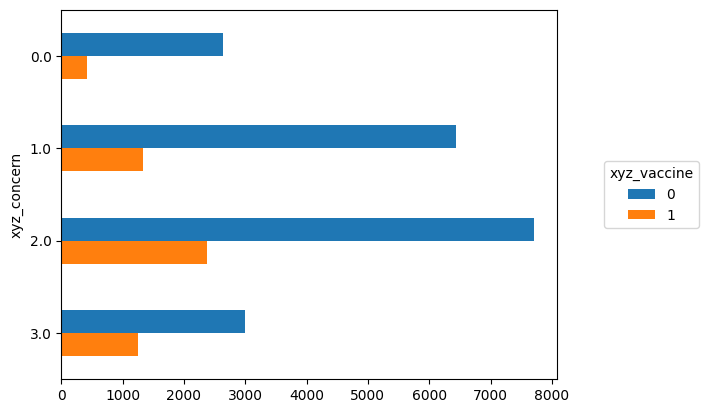

In [24]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3,0.5),
    title='xyz_vaccine'
)

In [25]:
xyz_concern_counts = counts.sum(axis='columns')
xyz_concern_counts

xyz_concern
0.0     3056
1.0     7773
2.0    10081
3.0     4259
dtype: int64

In [26]:
props = counts.div(xyz_concern_counts, axis='index')
props

xyz_vaccine,0,1
xyz_concern,,
0.0,0.864202,0.135798
1.0,0.827737,0.172263
2.0,0.764111,0.235889
3.0,0.705095,0.294905


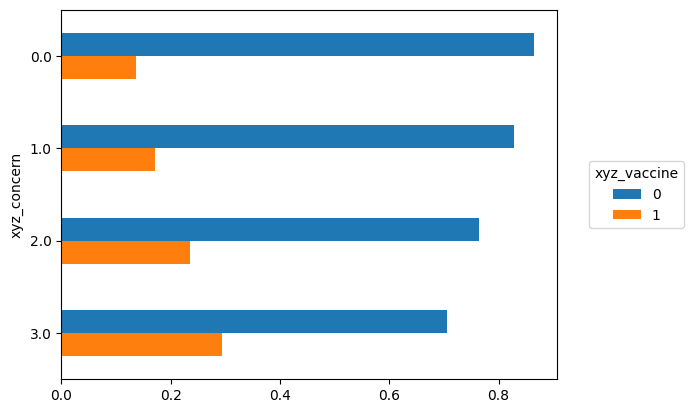

In [27]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc = 'center left',
    bbox_to_anchor=(1.05, 0.5),
    title='xyz_vaccine')

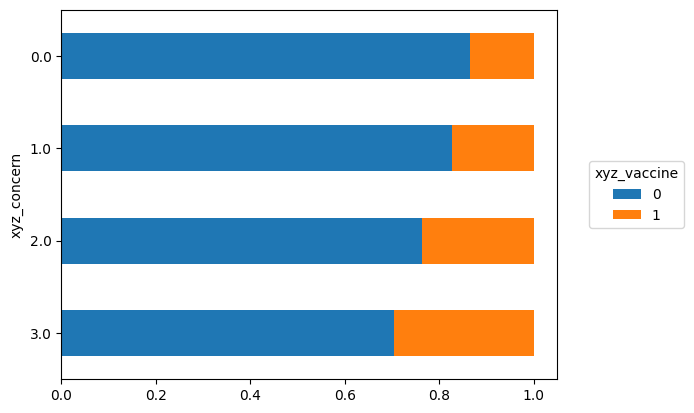

In [28]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='xyz_vaccine')

In [29]:
def vaccination_rate_plot(col, target, data, ax=None):
    counts = (entire_df[[target, col]]
                 .groupby([target,col])
                 .size()
                 .unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    
    props.plot(kind='barh', stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

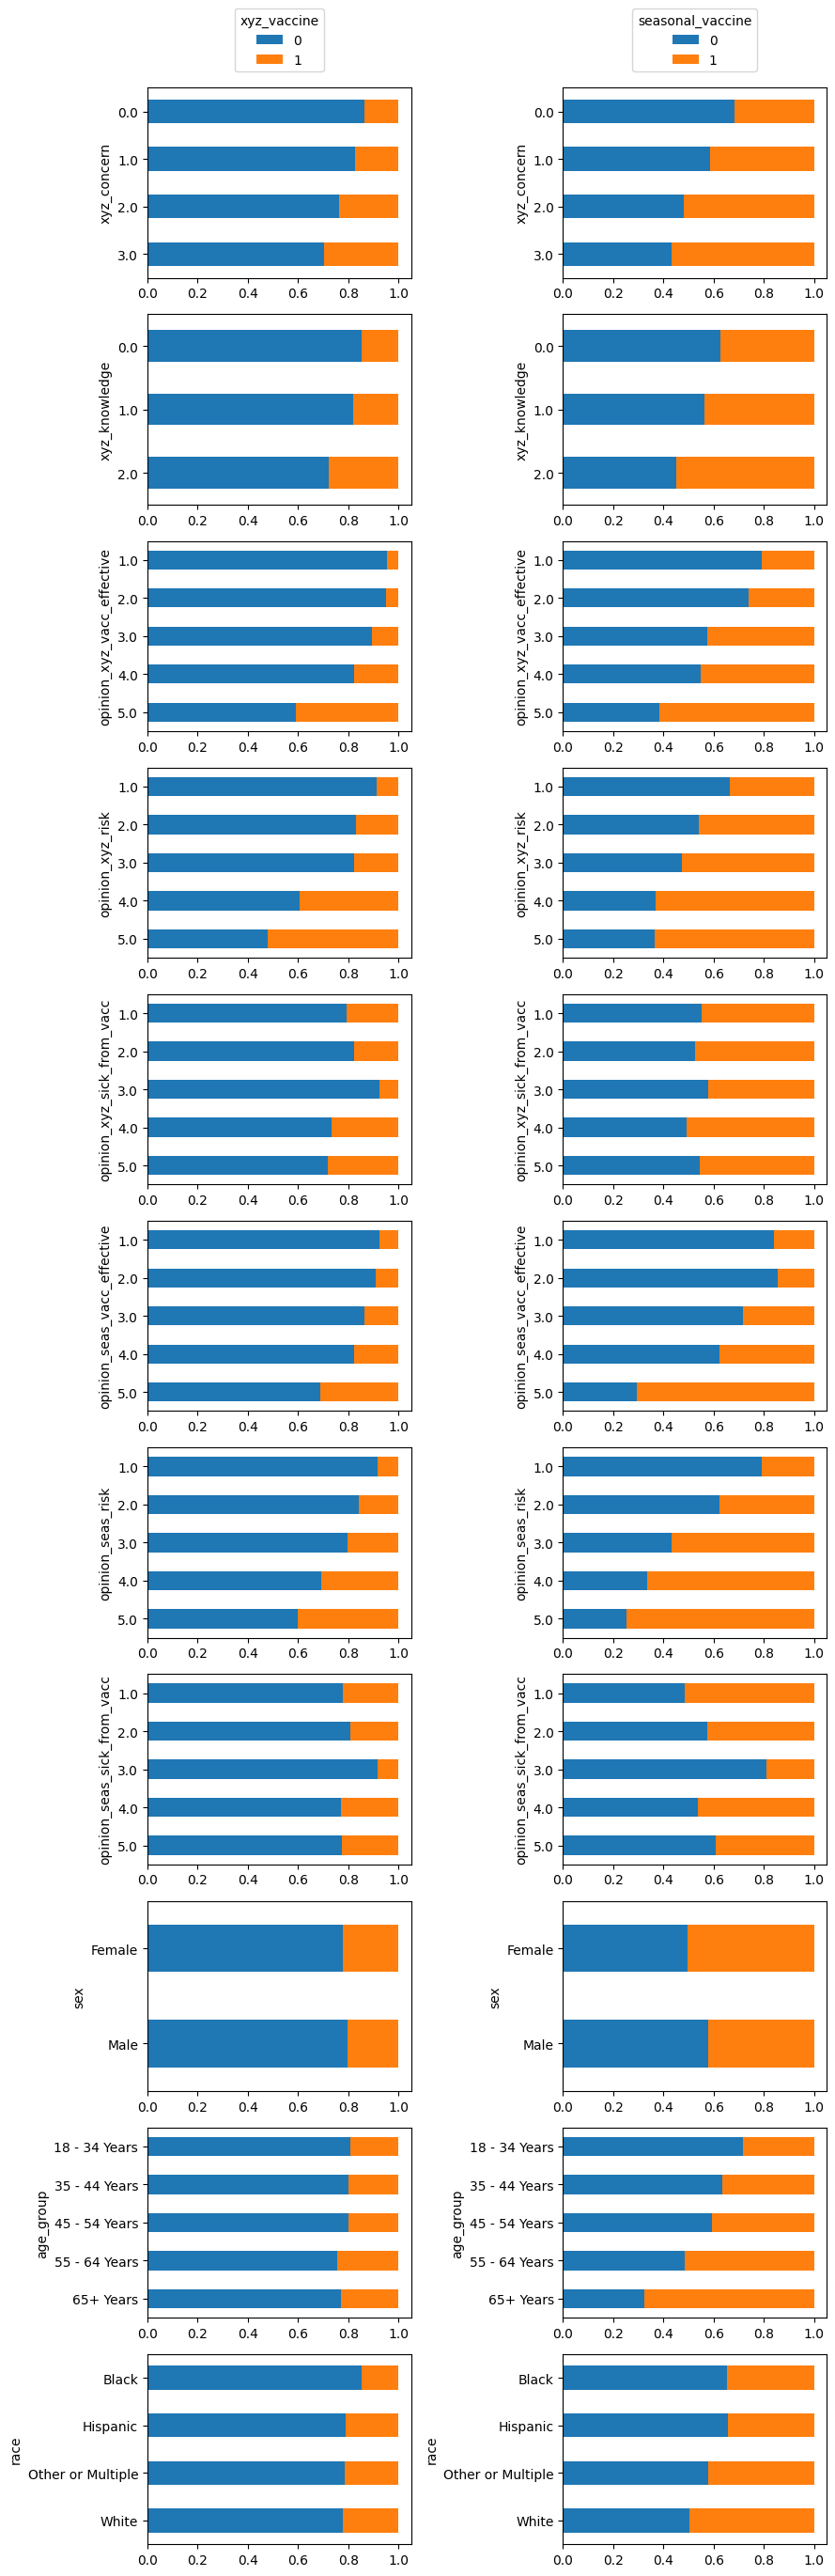

In [30]:
cols_to_plot = [
    'xyz_concern',
    'xyz_knowledge',
    'opinion_xyz_vacc_effective',
    'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race'
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'xyz_vaccine', entire_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', entire_df, ax=ax[idx,1])

ax[0,0].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='xyz_vaccine')
ax[0,1].legend(loc='lower center', bbox_to_anchor=(0.5,1.05), title='seasonal_vaccine')
fig.tight_layout()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [32]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values

In [33]:
numeric_cols

array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object)

In [34]:
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()),
                                        ('simple_imputer', SimpleImputer(strategy='median'))])


preprocessor = ColumnTransformer(transformers = [('numeric', numeric_preprocessing_steps, numeric_cols)], remainder = "drop")

In [35]:
estimators = MultiOutputClassifier(
    estimator = LogisticRegression(penalty='l2', C=1))

In [36]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimators', estimators),
])

In [37]:
import sklearn
print(sklearn.__version__)

1.2.0


In [38]:
from sklearn import set_config
set_config('diagram')

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'be...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [41]:
RANDOM_SEED = 4

X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [42]:
y_train

,xyz_vaccine,seasonal_vaccine
respondent_id,,
25297,1,1
25653,0,0
11831,0,0
14182,0,1
2112,0,0
...,...,...
11967,1,1
15378,0,0
10376,0,0


In [43]:
full_pipeline.fit(X_train, y_train)

preds = full_pipeline.predict_proba(X_eval)
preds

[array([[0.72121534, 0.27878466],
        [0.90932299, 0.09067701],
        [0.88918966, 0.11081034],
        ...,
        [0.93860268, 0.06139732],
        [0.96314987, 0.03685013],
        [0.98629357, 0.01370643]]),
 array([[0.77819689, 0.22180311],
        [0.76206708, 0.23793292],
        [0.67238548, 0.32761452],
        ...,
        [0.5913606 , 0.4086394 ],
        [0.84779935, 0.15220065],
        [0.95656969, 0.04343031]])]

In [44]:
y_preds = pd.DataFrame(
    {
        'xyz_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
5112,0.278785,0.221803
19662,0.090677,0.237933
17204,0.110810,0.327615
20841,0.301407,0.964246
12018,0.885440,0.931299


In [54]:
test_df = pd.read_csv("test_set_features.csv")
test_df = test_df.set_index('respondent_id')

In [55]:
test_preds = full_pipeline.predict_proba(test_df)
test_preds

[array([[0.86966819, 0.13033181],
        [0.94411466, 0.05588534],
        [0.63467386, 0.36532614],
        ...,
        [0.8028135 , 0.1971865 ],
        [0.95061697, 0.04938303],
        [0.38850177, 0.61149823]]),
 array([[0.56649072, 0.43350928],
        [0.92797113, 0.07202887],
        [0.35976968, 0.64023032],
        ...,
        [0.61066508, 0.38933492],
        [0.67520599, 0.32479401],
        [0.35675739, 0.64324261]])]

In [56]:
test_y_preds = pd.DataFrame(
    {
        'xyz_vaccine': test_preds[0][:,1],
        'seasonal_vaccine':test_preds[1][:,1],
    },
    index=test_df.index
)
test_y_preds.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.130332,0.433509
26708,0.055885,0.072029
26709,0.365326,0.640230
26710,0.468830,0.798673
26711,0.291816,0.629656


In [59]:
test_y_preds.to_csv("Submission_Test_Result.csv")